In [1]:
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3

In [3]:

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print("Quantum Circuit:")
print(qc.draw())

qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 

Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];


Simulation Result:
{'00': 521, '11': 503}


In [4]:
#Task 1 - Modify the circuit to have 3 qubits and apply a different gate sequence.

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(3)

# Apply different gates
qc.h(0)
qc.cx(0, 1)
qc.x(2)
qc.cz(1, 2)
qc.h(2)
qc.measure_all()

print("🔹 Quantum Circuit:")
print(qc.draw())


🔹 Quantum Circuit:
        ┌───┐              ░ ┌─┐      
   q_0: ┤ H ├──■───────────░─┤M├──────
        └───┘┌─┴─┐         ░ └╥┘┌─┐   
   q_1: ─────┤ X ├─■───────░──╫─┤M├───
        ┌───┐└───┘ │ ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├──────■─┤ H ├─░──╫──╫─┤M├
        └───┘        └───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════╩══╩══╩═
                              0  1  2 


In [5]:
#Task 2: Convert to OpenQASM 3

qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
x q[2];
cz q[1], q[2];
h q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];



In [6]:
#Task 3 - Identify gate representation
print("\n📘 Gate Representation in QASM:")
print("Hadamard gate -> 'h q[0];'")
print("CNOT gate -> 'cx q[0], q[1];'")
print("Barrier -> 'barrier q[0], q[1], q[2];'")



📘 Gate Representation in QASM:
Hadamard gate -> 'h q[0];'
CNOT gate -> 'cx q[0], q[1];'
Barrier -> 'barrier q[0], q[1], q[2];'


In [7]:
#Task 4 - Simulate the circuit

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()
counts = result.get_counts()

print("\nSimulation Results:")
print(counts)



Simulation Results:
{'100': 533, '011': 522, '111': 466, '000': 527}


In [8]:
!pip install qiskit qiskit_aer qiskit-qasm3-import

=== Original Circuit ===
     ┌───┐      ░      ┌─┐              
q_0: ┤ H ├──■───░──────┤M├──────────────
     └───┘┌─┴─┐ ░      └╥┘        ┌─┐   
q_1: ─────┤ X ├─░───────╫──■──────┤M├───
          └───┘ ░ ┌───┐ ║  │ ┌───┐└╥┘┌─┐
q_2: ───────────░─┤ X ├─╫──■─┤ H ├─╫─┤M├
                ░ └───┘ ║    └───┘ ║ └╥┘
c: 3/═══════════════════╩══════════╩══╩═
                        0          1  2 

=== Simulation Results ===
Original Ideal: {'100': 512, '000': 512, '011': 542, '111': 482}
Original Noisy: {'101': 18, '001': 23, '110': 17, '100': 491, '010': 17, '000': 502, '011': 503, '111': 477}
Reloaded Ideal: {'000': 534, '011': 447, '111': 555, '100': 512}
Reloaded Noisy: {'101': 9, '001': 18, '110': 14, '100': 488, '011': 499, '111': 474, '010': 18, '000': 528}


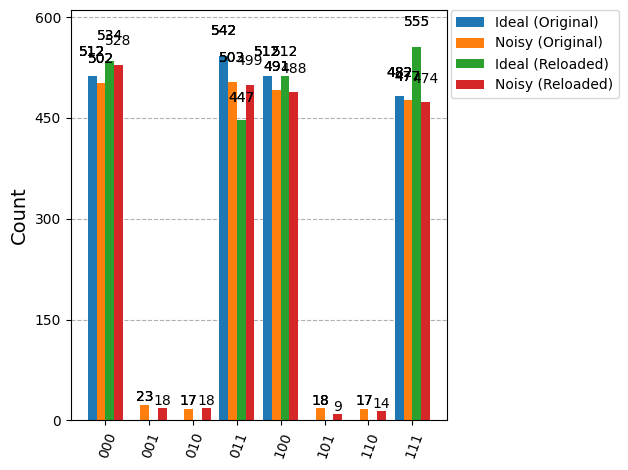

In [9]:
#Task 5 - Noise model integration
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import qiskit.qasm3 as qasm3
import qiskit_qasm3_import
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.03, 2), ['cx', 'cz'])

orig_qc = QuantumCircuit(3, 3)
orig_qc.h(0)           # Hadamard on q0
orig_qc.cx(0, 1)       # CNOT q0 -> q1
orig_qc.barrier()      # Add a barrier
orig_qc.x(2)           # Pauli-X on q2
orig_qc.cz(1, 2)       # Controlled-Z between q1 and q2
orig_qc.h(2)           # Hadamard on q2
orig_qc.measure(range(3), range(3))  # Measure all

print("=== Original Circuit ===")
print(orig_qc.draw())

qasm_text = qasm3.dumps(orig_qc)
reloaded_qc = qasm3.loads(qasm_text)

sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=noise_model)

def run_and_get_counts(qc, simulator, shots=2048):
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=shots).result()
    return result.get_counts()

shots = 2048
orig_ideal_counts   = run_and_get_counts(orig_qc, sim_ideal, shots)
orig_noisy_counts   = run_and_get_counts(orig_qc, sim_noisy, shots)
reload_ideal_counts = run_and_get_counts(reloaded_qc, sim_ideal, shots)
reload_noisy_counts = run_and_get_counts(reloaded_qc, sim_noisy, shots)

print("\n=== Simulation Results ===")
print("Original Ideal:", orig_ideal_counts)
print("Original Noisy:", orig_noisy_counts)
print("Reloaded Ideal:", reload_ideal_counts)
print("Reloaded Noisy:", reload_noisy_counts)

datasets = [orig_ideal_counts, orig_noisy_counts, reload_ideal_counts, reload_noisy_counts]
labels   = ["Ideal (Original)", "Noisy (Original)", "Ideal (Reloaded)", "Noisy (Reloaded)"]

display(plot_histogram(datasets, legend=labels))